### ARYAN SONI BURMAN - 1761012

In [8]:
import nltk
# Library import for Tokenization of words
from nltk.tokenize import word_tokenize
# Library import for stopwords
from nltk.corpus import stopwords
# Library import for Lammatizer
from nltk.stem import WordNetLemmatizer
# Library import for Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
# Library import for LexicalAnalysis
import nltk.sentiment.util as lexi
from nltk.corpus import opinion_lexicon
# Library import for Color
from termcolor import colored

In [2]:
#Removing System Warning
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [19]:
class returnBOW:
    def __init__(self, sentence):
        self.sentence = sentence
        
    def word_tokenize(self):
        words = word_tokenize(self.sentence)
        return words
    
    def remove_stopwords(self):
        stop_words = set(stopwords.words("english"))
        words = word_tokenize(self.sentence)
        words_filtered=[]
        for word in words:
            if word not in stop_words:
                words_filtered.append(word)
        return words_filtered
    
    def word_lammatize(self):
        lemmatizer = WordNetLemmatizer() 
        filtered_words = self.remove_stopwords()
        lemmatized_words = []
        for word in filtered_words:
            lemmatized_words.append(lemmatizer.lemmatize(word))
        return lemmatized_words
    
    def word_stemming(self):
        stemmed_words=[]
        lemmatized_words = self.word_lammatize()
        for word in lemmatized_words:
            stemmed_words.append(ps.stem(word.lower()))
        return stemmed_words
    
    def lexical_analysis(self, preprocessing_extent='word', plot=False):
        
        pos_words = 0
        neg_words = 0
        
        if(preprocessing_extent == 'stemm'):
            tokenized_sent = self.word_stemming()
        if(preprocessing_extent == 'lamm'):
            tokenized_sent = self.word_lammatize()
        if(preprocessing_extent == 'stop'):
            tokenized_sent = self.word_lammatize()
        if(preprocessing_extent == 'word'):
            tokenized_sent = self.word_tokenize()

        x = list(range(len(tokenized_sent))) # x axis for the plot
        y = []

        for word in tokenized_sent:
            if word in opinion_lexicon.positive():
                pos_words += 1
                y.append(1) # positive
            elif word in opinion_lexicon.negative():
                if word == 'not':
                    neg_words += 2
                    y.append(-1)
                else:
                    neg_words += 1
                    y.append(-1) # negative
            else:
                y.append(0) # neutral

        if pos_words > neg_words:
            print(colored('\nPositive Sentence', 'green', attrs=['bold']))
            print('Total Positive Words : ',pos_words)
        elif pos_words < neg_words:
            print(colored('\nNegative Sentence', 'red', attrs=['bold']))
            print('Negative Sentence, Total Negative Words : ',neg_words)
        elif pos_words == neg_words:
            print(colored('\nNeutral Sentence', 'yellow', attrs=['bold']))
            print('Neutral Sentence, Total Neutral Words : ',len(tokenized_sent)-(pos_words+neg_words))

        if plot == True:
            lexi._show_plot(x, y, x_labels=tokenized_sent, y_labels=['Negative', 'Neutral', 'Positive']) 

Enter a Sentence : You are a nice person

Positive Sentence
Total Positive Words :  1


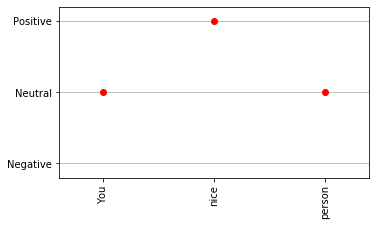

enter "yes" to continue : yes
Enter a Sentence : You are a bad person

Negative Sentence
Negative Sentence, Total Negative Words :  1


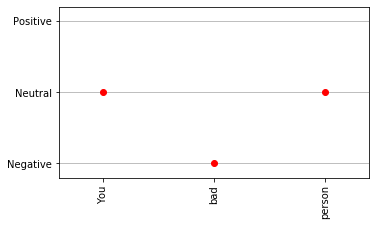

enter "yes" to continue : yes
Enter a Sentence : That is my house in the corner

Neutral Sentence
Neutral Sentence, Total Neutral Words :  3


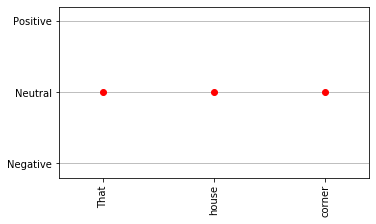

enter "yes" to continue : no
Thank You


In [24]:
perm = True
while(perm):
    sentence = input('Enter a Sentence : ')
    bag_of_words = returnBOW(sentence)
    bag_of_words.lexical_analysis(plot=True, preprocessing_extent='stop')
    perm = input('enter "yes" to continue : ')
    if(perm.lower() != "yes"):
        print('Thank You')
        break